In [88]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from pandas import Series
from pandas import DataFrame
from pandas.tools.plotting import scatter_matrix
from pylab import rcParams
import scipy as sp
import seaborn as sns

from scipy.stats.stats import pearsonr
from scipy.stats import spearmanr
from scipy.stats import chi2_contingency

In [2]:
rcParams['figure.figsize'] = 8,4
sns.set_style('whitegrid')

## Data visualization

In [3]:
# defining plot color
x= range(1,10)
y=[1,2,3,4,0.5,4,3,2,1]

<BarContainer object of 9 artists>

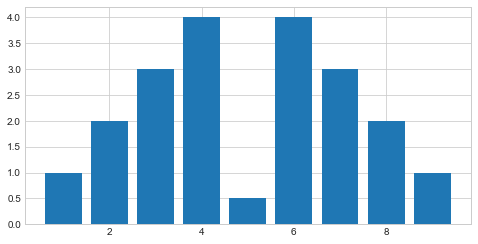

In [4]:
plt.bar(x,y)

<BarContainer object of 9 artists>

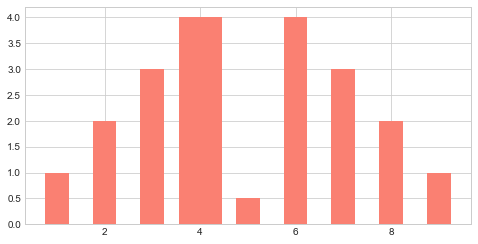

In [5]:
wide=[0.5,0.5,0.5,0.9,0.5,0.5,0.5,0.5,0.5]
color=['salmon']
plt.bar(x,y,width=wide,color=color,align='center')

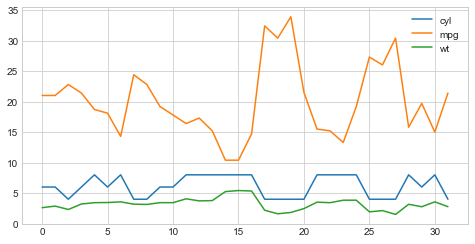

In [6]:
address='C:/Users/chunter/Desktop/Analytics Tools/Python Learning/Ex_Files_Python_Data_Science_EssT/Ex_Files_Python_Data_Science_EssT/Exercise Files/Ch02/02_03/mtcars.csv'
cars=pd.read_csv(address)
cars.columns=['car_names','mpg','cyl','disp','hp','drat','wt','qsec','vs','am','gear','carb']

df=cars[['cyl','mpg','wt']]
df.plot()

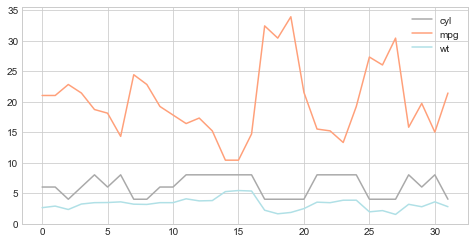

In [7]:
color_theme=['darkgray','lightsalmon','powderblue']
df.plot(color=color_theme)

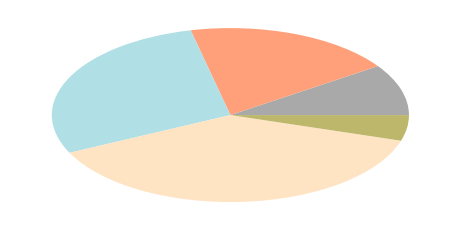

In [8]:
#use "colors" when using hex numbers for colors
color_theme2=['#A9A9A9','#FFA07A','#B0E0E6','#FFE4C4','#BDB76B']
z=[1,2,3,4,0.5]
plt.pie(z,colors=color_theme2)
plt.show()

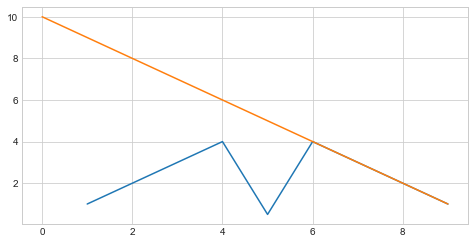

In [9]:
# customizing line styles
x1= range(0,10)
y1=[10,9,8,7,6,5,4,3,2,1]

plt.plot(x,y)
plt.plot(x1,y1)



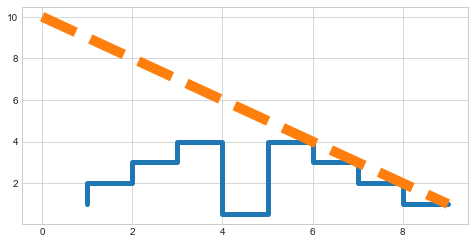

In [10]:
# customizing line styles
x1= range(0,10)
y1=[10,9,8,7,6,5,4,3,2,1]

plt.plot(x,y,ls='steps',lw=5)
plt.plot(x1,y1,ls='--',lw=10)


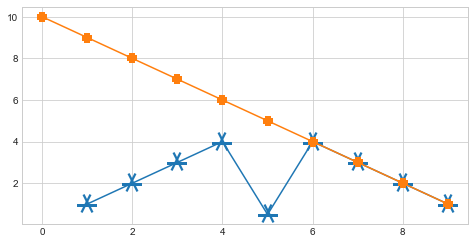

In [11]:
#customer markers
# customizing line styles
x1= range(0,10)
y1=[10,9,8,7,6,5,4,3,2,1]

plt.plot(x,y, marker='1', mew=20)
plt.plot(x1,y1,marker="+",mew=10)


### Create labels and Annotations

Text(0,0.5,'My-Y label')

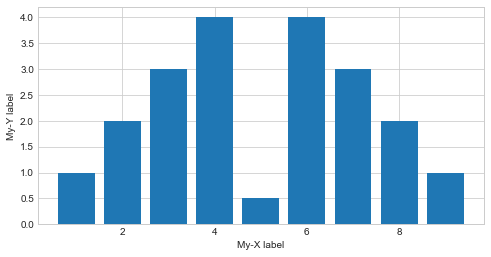

In [12]:
#labeling plot features with the functional method
plt.bar(x,y)
plt.xlabel('My-X label')
plt.ylabel('My-Y label')

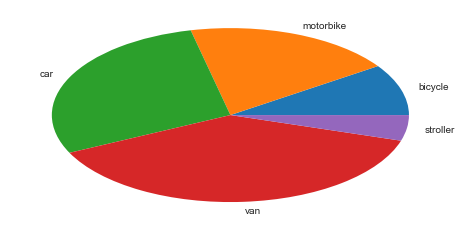

In [13]:
z=[1,2,3,4,0.5]
veh_type=['bicycle','motorbike','car','van','stroller']
plt.pie(z, labels=veh_type)
plt.show()

Text(0,0.5,'Miles per Gallon')

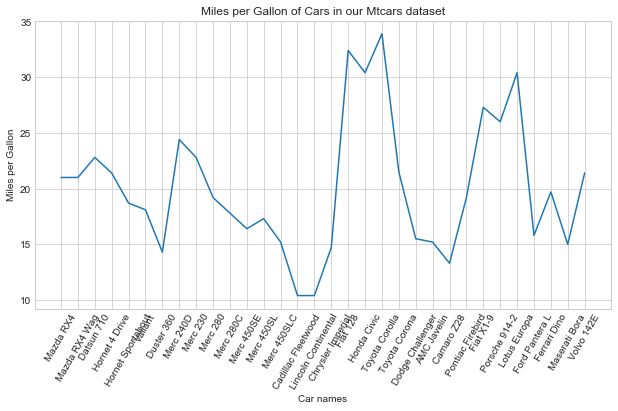

In [14]:
address='C:/Users/chunter/Desktop/Analytics Tools/Python Learning/Ex_Files_Python_Data_Science_EssT/Ex_Files_Python_Data_Science_EssT/Exercise Files/Ch02/02_03/mtcars.csv'
cars=pd.read_csv(address)
cars.columns=['car_names','mpg','cyl','disp','hp','drat','wt','qsec','vs','am','gear','carb']

mpg=cars.mpg

fig =plt.figure()
ax=fig.add_axes([.1,.1,1,1])

mpg.plot()

ax.set_xticks(range(32))
ax.set_xticklabels(cars.car_names,rotation=60, fontsize='medium')
ax.set_title('Miles per Gallon of Cars in our Mtcars dataset')

ax.set_xlabel('Car names')
ax.set_ylabel('Miles per Gallon')

### Adding a legend

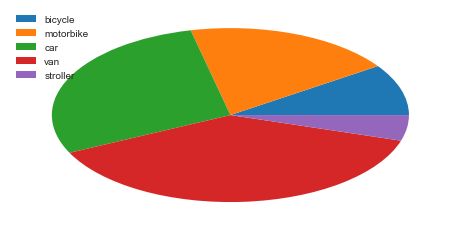

In [15]:
#adding legend with functional method
plt.pie(z)
plt.legend(veh_type,loc='best')
plt.show()

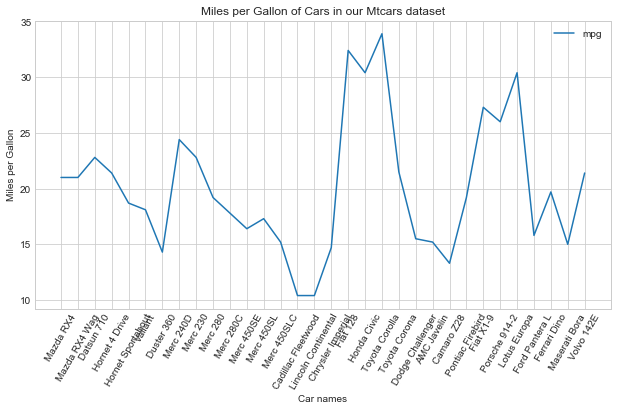

In [16]:
#using the object oriented method
fig=plt.figure()
ax = fig.add_axes([.1,.1,1,1])
mpg.plot()

ax.set_xticks(range(32))
ax.set_xticklabels(cars.car_names,rotation=60, fontsize='medium')
ax.set_title('Miles per Gallon of Cars in our Mtcars dataset')

ax.set_xlabel('Car names')
ax.set_ylabel('Miles per Gallon')

ax.legend(loc='best')

### annotate your plot

In [17]:
mpg.idxmax() # find the row index of the max value

19

In [18]:
mpg.max()

33.9

In [19]:
cars.iloc[19]

car_names    Toyota Corolla
mpg                    33.9
cyl                       4
disp                   71.1
hp                       65
drat                   4.22
wt                    1.835
qsec                   19.9
vs                        1
am                        1
gear                      4
carb                      1
Name: 19, dtype: object

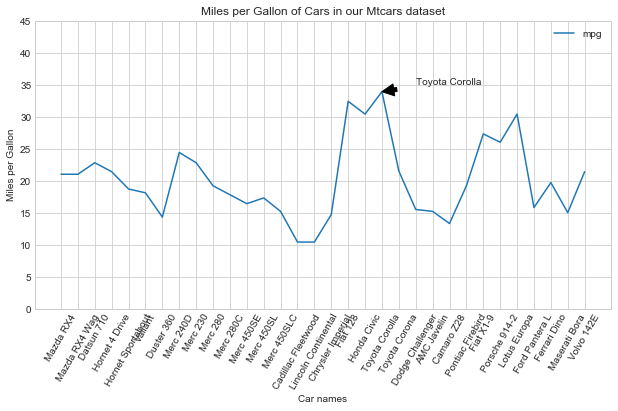

In [20]:
fig=plt.figure()
ax = fig.add_axes([.1,.1,1,1])
mpg.plot()

ax.set_xticks(range(32))
ax.set_xticklabels(cars.car_names,rotation=60, fontsize='medium')
ax.set_title('Miles per Gallon of Cars in our Mtcars dataset')

ax.set_xlabel('Car names')
ax.set_ylabel('Miles per Gallon')
ax.set_ylim(0,45)

ax.annotate('Toyota Corolla',xy=(19,33.9),xytext=(21,35),
            arrowprops=dict(facecolor='black',shrink=0.5))

ax.legend(loc='best')

### Create visualizations from time series data

In [21]:
address = 'C:/Users/chunter/Desktop/Analytics Tools/Python Learning/Ex_Files_Python_Data_Science_EssT/Ex_Files_Python_Data_Science_EssT/Exercise Files/Ch02/02_05/Superstore-Sales.csv'

df2 = pd.read_csv(address,index_col='Order Date',parse_dates=True,encoding = "ISO-8859-1")

df2.head()

,Row ID,Order ID,Order Priority,Order Quantity,Sales,Discount,Ship Mode,Profit,Unit Price,Shipping Cost,Customer Name,Province,Region,Customer Segment,Product Category,Product Sub-Category,Product Name,Product Container,Product Base Margin,Ship Date
Order Date,,,,,,,,,,,,,,,,,,,,
2010-10-13,1,3,Low,6,261.5400,0.04,Regular Air,-213.25,38.94,35.00,Muhammed MacIntyre,Nunavut,Nunavut,Small Business,Office Supplies,Storage & Organization,"Eldon Base for stackable storage shelf, platinum",Large Box,0.80,10/20/2010
2012-10-01,49,293,High,49,10123.0200,0.07,Delivery Truck,457.81,208.16,68.02,Barry French,Nunavut,Nunavut,Consumer,Office Supplies,Appliances,"1.7 Cubic Foot Compact ""Cube"" Office Refrigera...",Jumbo Drum,0.58,10/2/2012
2012-10-01,50,293,High,27,244.5700,0.01,Regular Air,46.71,8.69,2.99,Barry French,Nunavut,Nunavut,Consumer,Office Supplies,Binders and Binder Accessories,"Cardinal Slant-D® Ring Binder, Heavy Gauge Vinyl",Small Box,0.39,10/3/2012
2011-07-10,80,483,High,30,4965.7595,0.08,Regular Air,1198.97,195.99,3.99,Clay Rozendal,Nunavut,Nunavut,Corporate,Technology,Telephones and Communication,R380,Small Box,0.58,7/12/2011
2010-08-28,85,515,Not Specified,19,394.2700,0.08,Regular Air,30.94,21.78,5.94,Carlos Soltero,Nunavut,Nunavut,Consumer,Office Supplies,Appliances,Holmes HEPA Air Purifier,Medium Box,0.50,8/30/2010


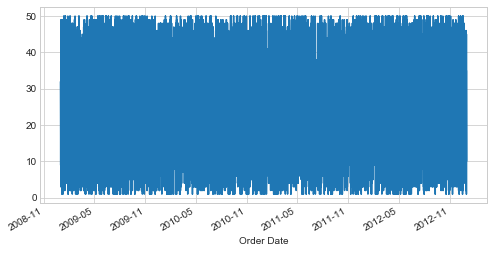

In [22]:
df2['Order Quantity'].plot()

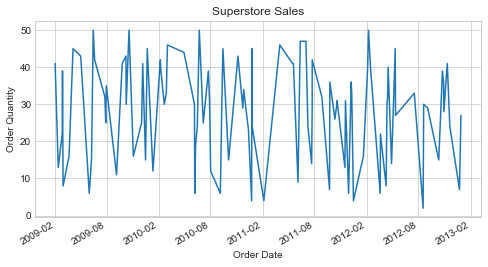

In [23]:
df3=df2.sample(n=100,random_state=25,axis=0)
plt.xlabel('Order Date')
plt.ylabel('Order Quantity')
plt.title('Superstore Sales')
df3['Order Quantity'].plot()

In [24]:
df3['Order Quantity'].unique()

array([43,  6, 41, 36, 25, 23, 22, 30, 50, 29, 46, 32,  7, 33, 15,  4, 42,
       12, 16, 13, 27, 45, 24, 39, 31, 14,  2, 35, 19, 40,  9,  8, 26, 47,
       44, 34, 28, 11], dtype=int64)

### Construct Histograms, boxplots, and scatter plots

### Histograms

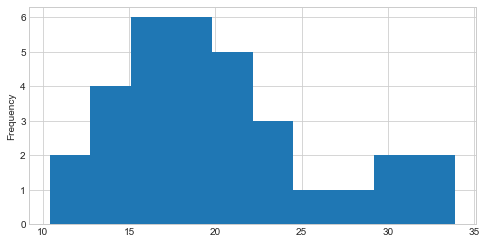

In [25]:
mpg.plot(kind='hist')

[]

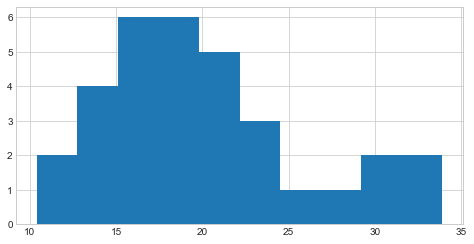

In [26]:
#using matplotlib
plt.hist(mpg)
plt.plot()

C:\Users\chunter\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


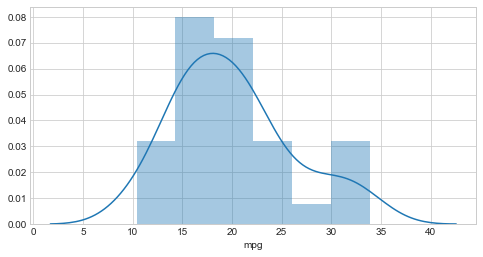

In [27]:
#using seaborn
sns.distplot(mpg)

### Scatterplots

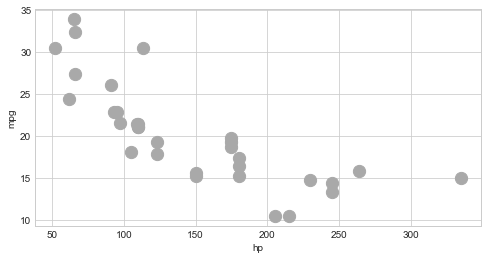

In [28]:
# scatter plots
cars.plot(kind='scatter',x='hp',y='mpg',c='darkgray',s=150)

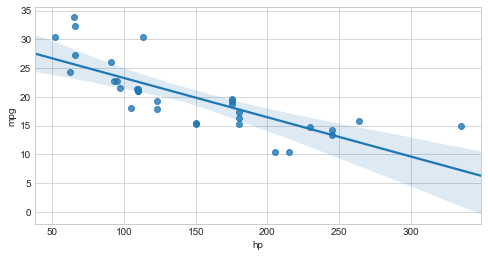

In [29]:
# using seaborn
sns.regplot(data=cars,x='hp',y='mpg',scatter=True)

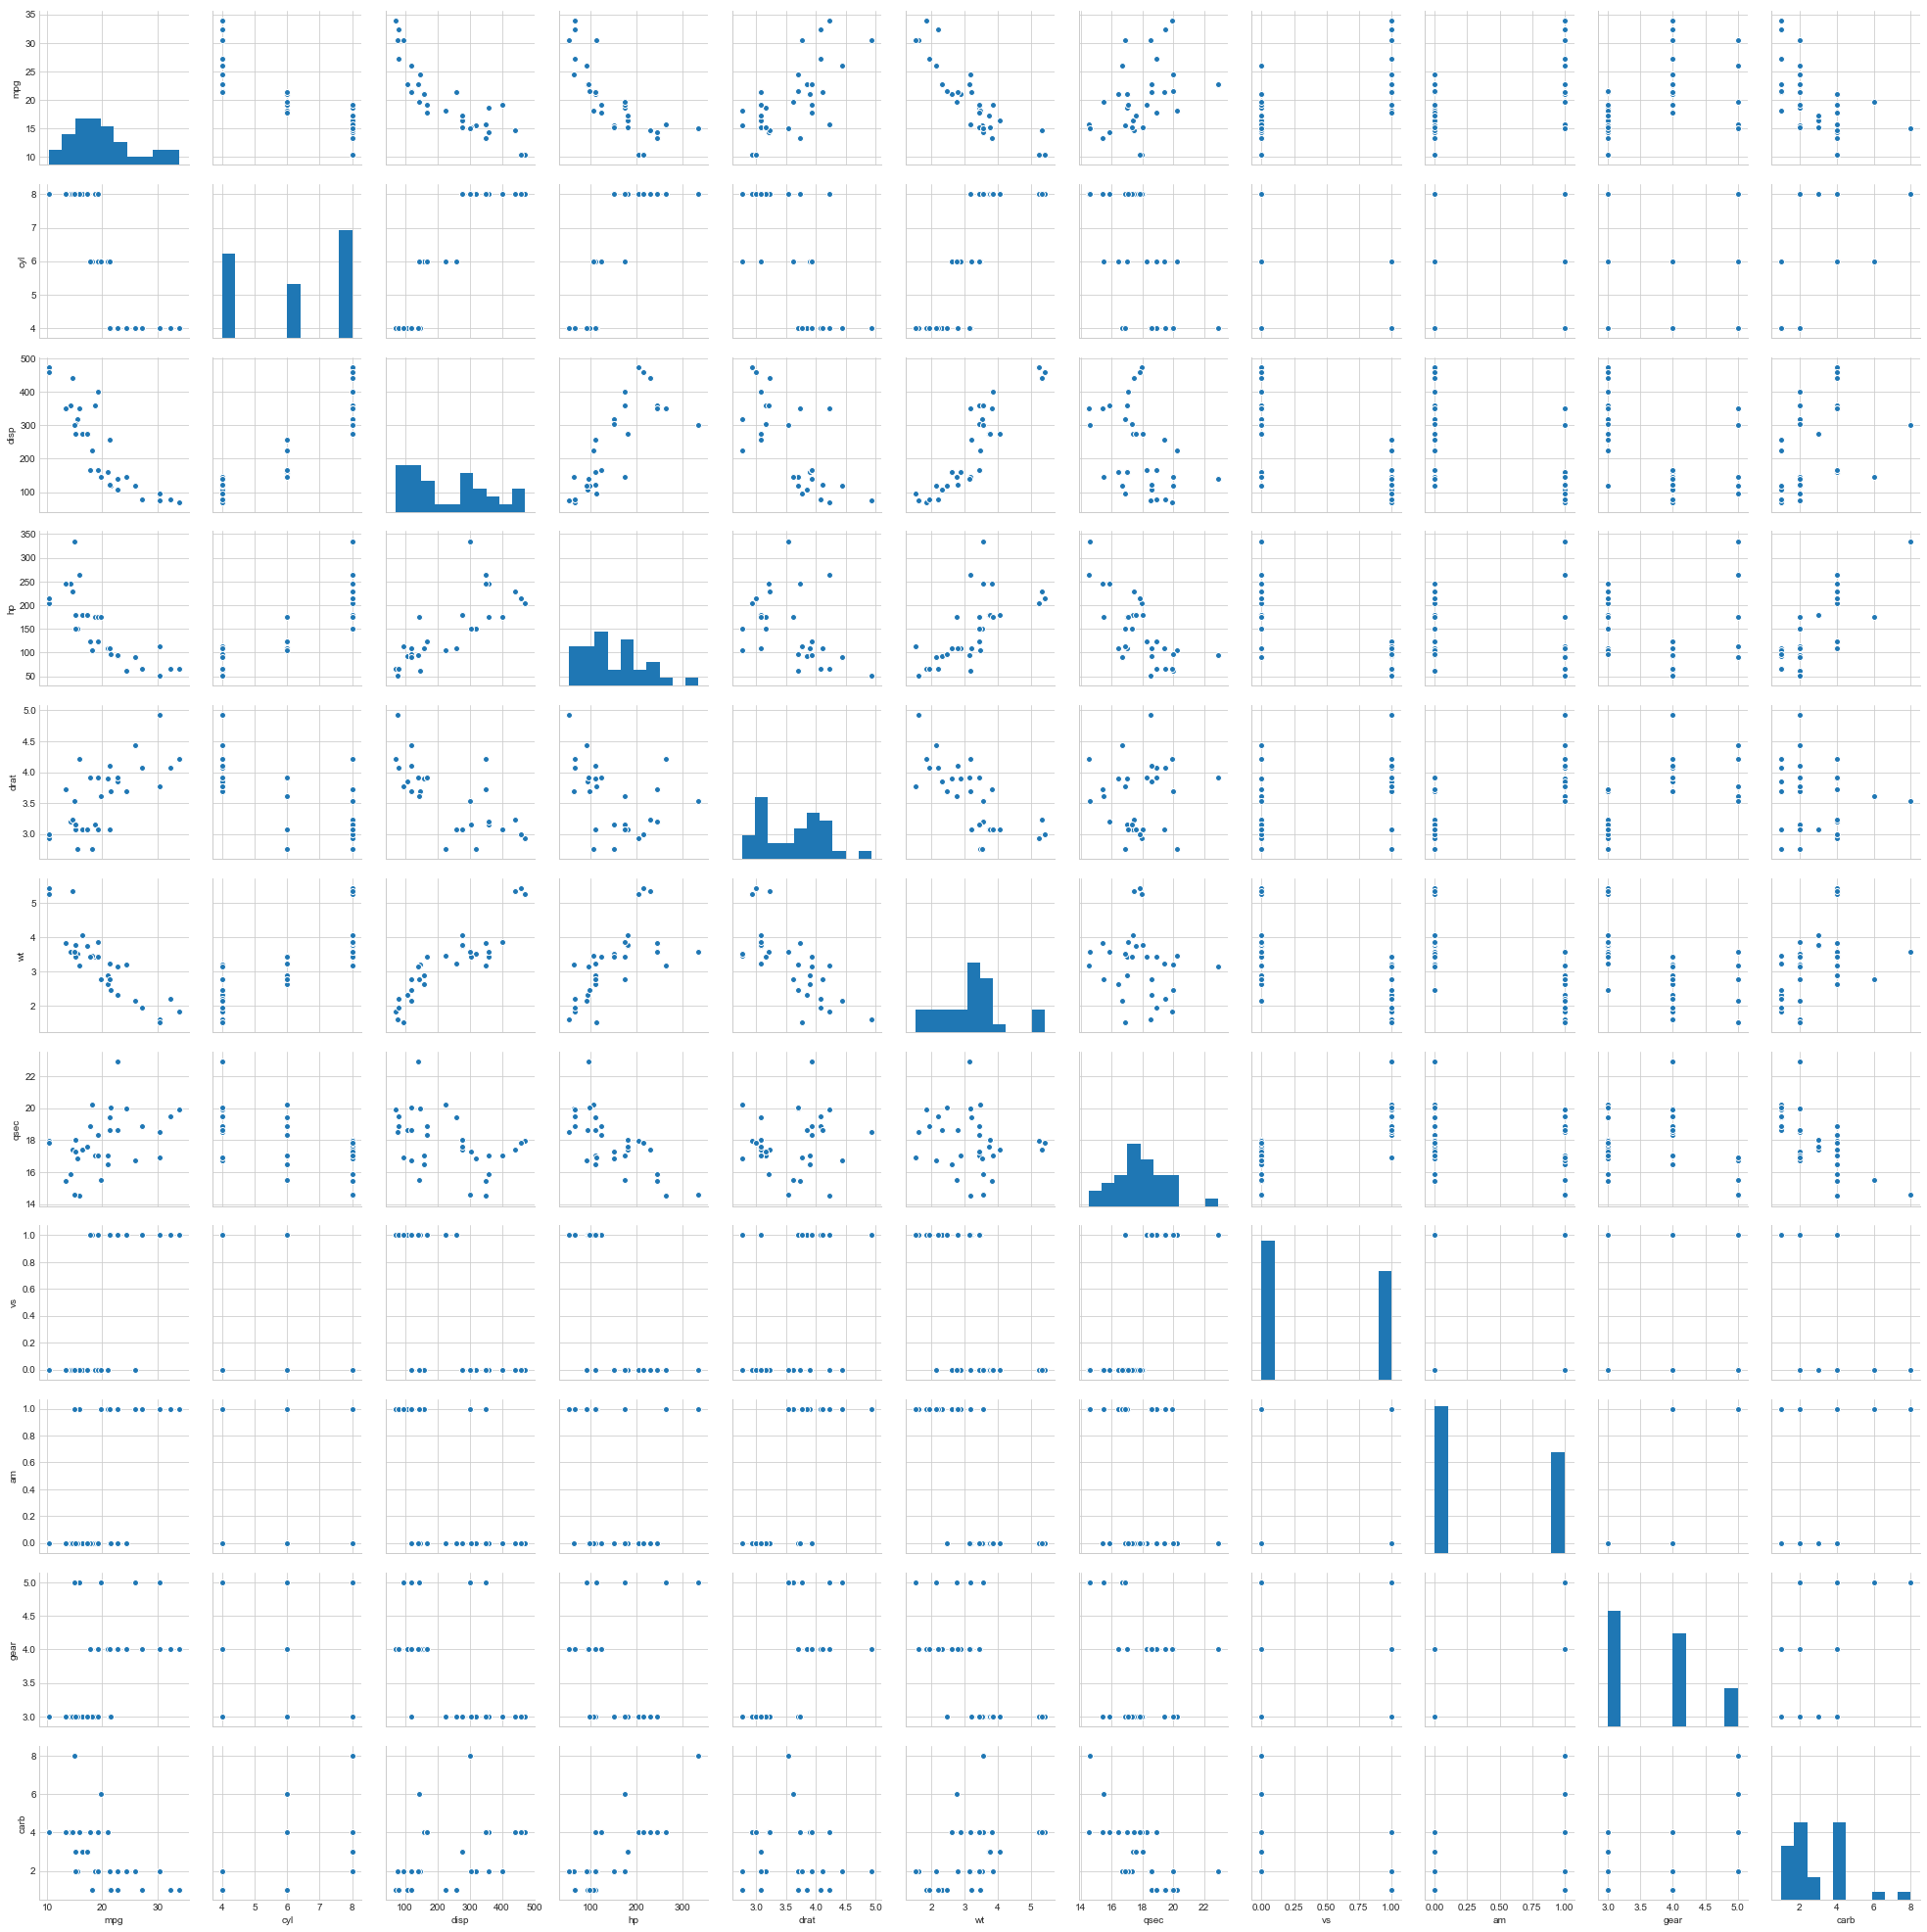

In [30]:
# create scatterplot matrix
sns.pairplot(cars)

In [31]:
cars.head()

,car_names,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [32]:
cars_df=cars[['mpg','disp','hp','wt','am']]
#cars_target=cars['am']
#target_names=

In [33]:
cars_df

,mpg,disp,hp,wt,am
0,21.0,160.0,110,2.620,1
1,21.0,160.0,110,2.875,1
2,22.8,108.0,93,2.320,1
3,21.4,258.0,110,3.215,0
4,18.7,360.0,175,3.440,0
5,18.1,225.0,105,3.460,0
6,14.3,360.0,245,3.570,0
7,24.4,146.7,62,3.190,0
8,22.8,140.8,95,3.150,0
9,19.2,167.6,123,3.440,0


## Math and Statitics

In [34]:
cars.head()

,car_names,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [35]:
carb=cars.carb

carb.value_counts()

4    10
2    10
1     7
3     3
8     1
6     1
Name: carb, dtype: int64

In [38]:
cars_cat=cars[['cyl','vs','am','gear','carb']]
cars_cat.head()

,cyl,vs,am,gear,carb
0,6,0,1,4,4
1,6,0,1,4,4
2,4,1,1,4,1
3,6,1,0,3,1
4,8,0,0,3,2


In [39]:
gears_group=cars_cat.groupby('gear')
gears_group.describe()

am                                               carb           ...   \
     count      mean       std  min  25%  50%  75%  max count      mean ...    
gear                                                                    ...    
3     15.0  0.000000  0.000000  0.0  0.0  0.0  0.0  0.0  15.0  2.666667 ...    
4     12.0  0.666667  0.492366  0.0  0.0  1.0  1.0  1.0  12.0  2.333333 ...    
5      5.0  1.000000  0.000000  1.0  1.0  1.0  1.0  1.0   5.0  4.400000 ...    

      cyl         vs                                               
      75%  max count      mean       std  min  25%  50%  75%  max  
gear                                                               
3     8.0  8.0  15.0  0.200000  0.414039  0.0  0.0  0.0  0.0  1.0  
4     6.0  6.0  12.0  0.833333  0.389249  0.0  1.0  1.0  1.0  1.0  
5     8.0  8.0   5.0  0.200000  0.447214  0.0  0.0  0.0  0.0  1.0  

[3 rows x 32 columns]

### Transforming variables to categorical type

In [42]:
cars['group']=pd.Series(cars.gear,dtype='category')

In [47]:
cars.group.dtypes

CategoricalDtype(categories=[3, 4, 5], ordered=False)

In [48]:
cars.group.value_counts()

3    15
4    12
5     5
Name: group, dtype: int64

In [49]:
cars.columns

Index(['car_names', 'mpg', 'cyl', 'disp', 'hp', 'drat', 'wt', 'qsec', 'vs',
       'am', 'gear', 'carb', 'group'],
      dtype='object')

In [52]:
pd.crosstab(cars.hp,cars.gear)

gear,3,4,5
hp,,,
52,0,1,0
62,0,1,0
65,0,1,0
66,0,2,0
91,0,0,1
93,0,1,0
95,0,1,0
97,1,0,0
105,1,0,0


### The Pearson Correlation

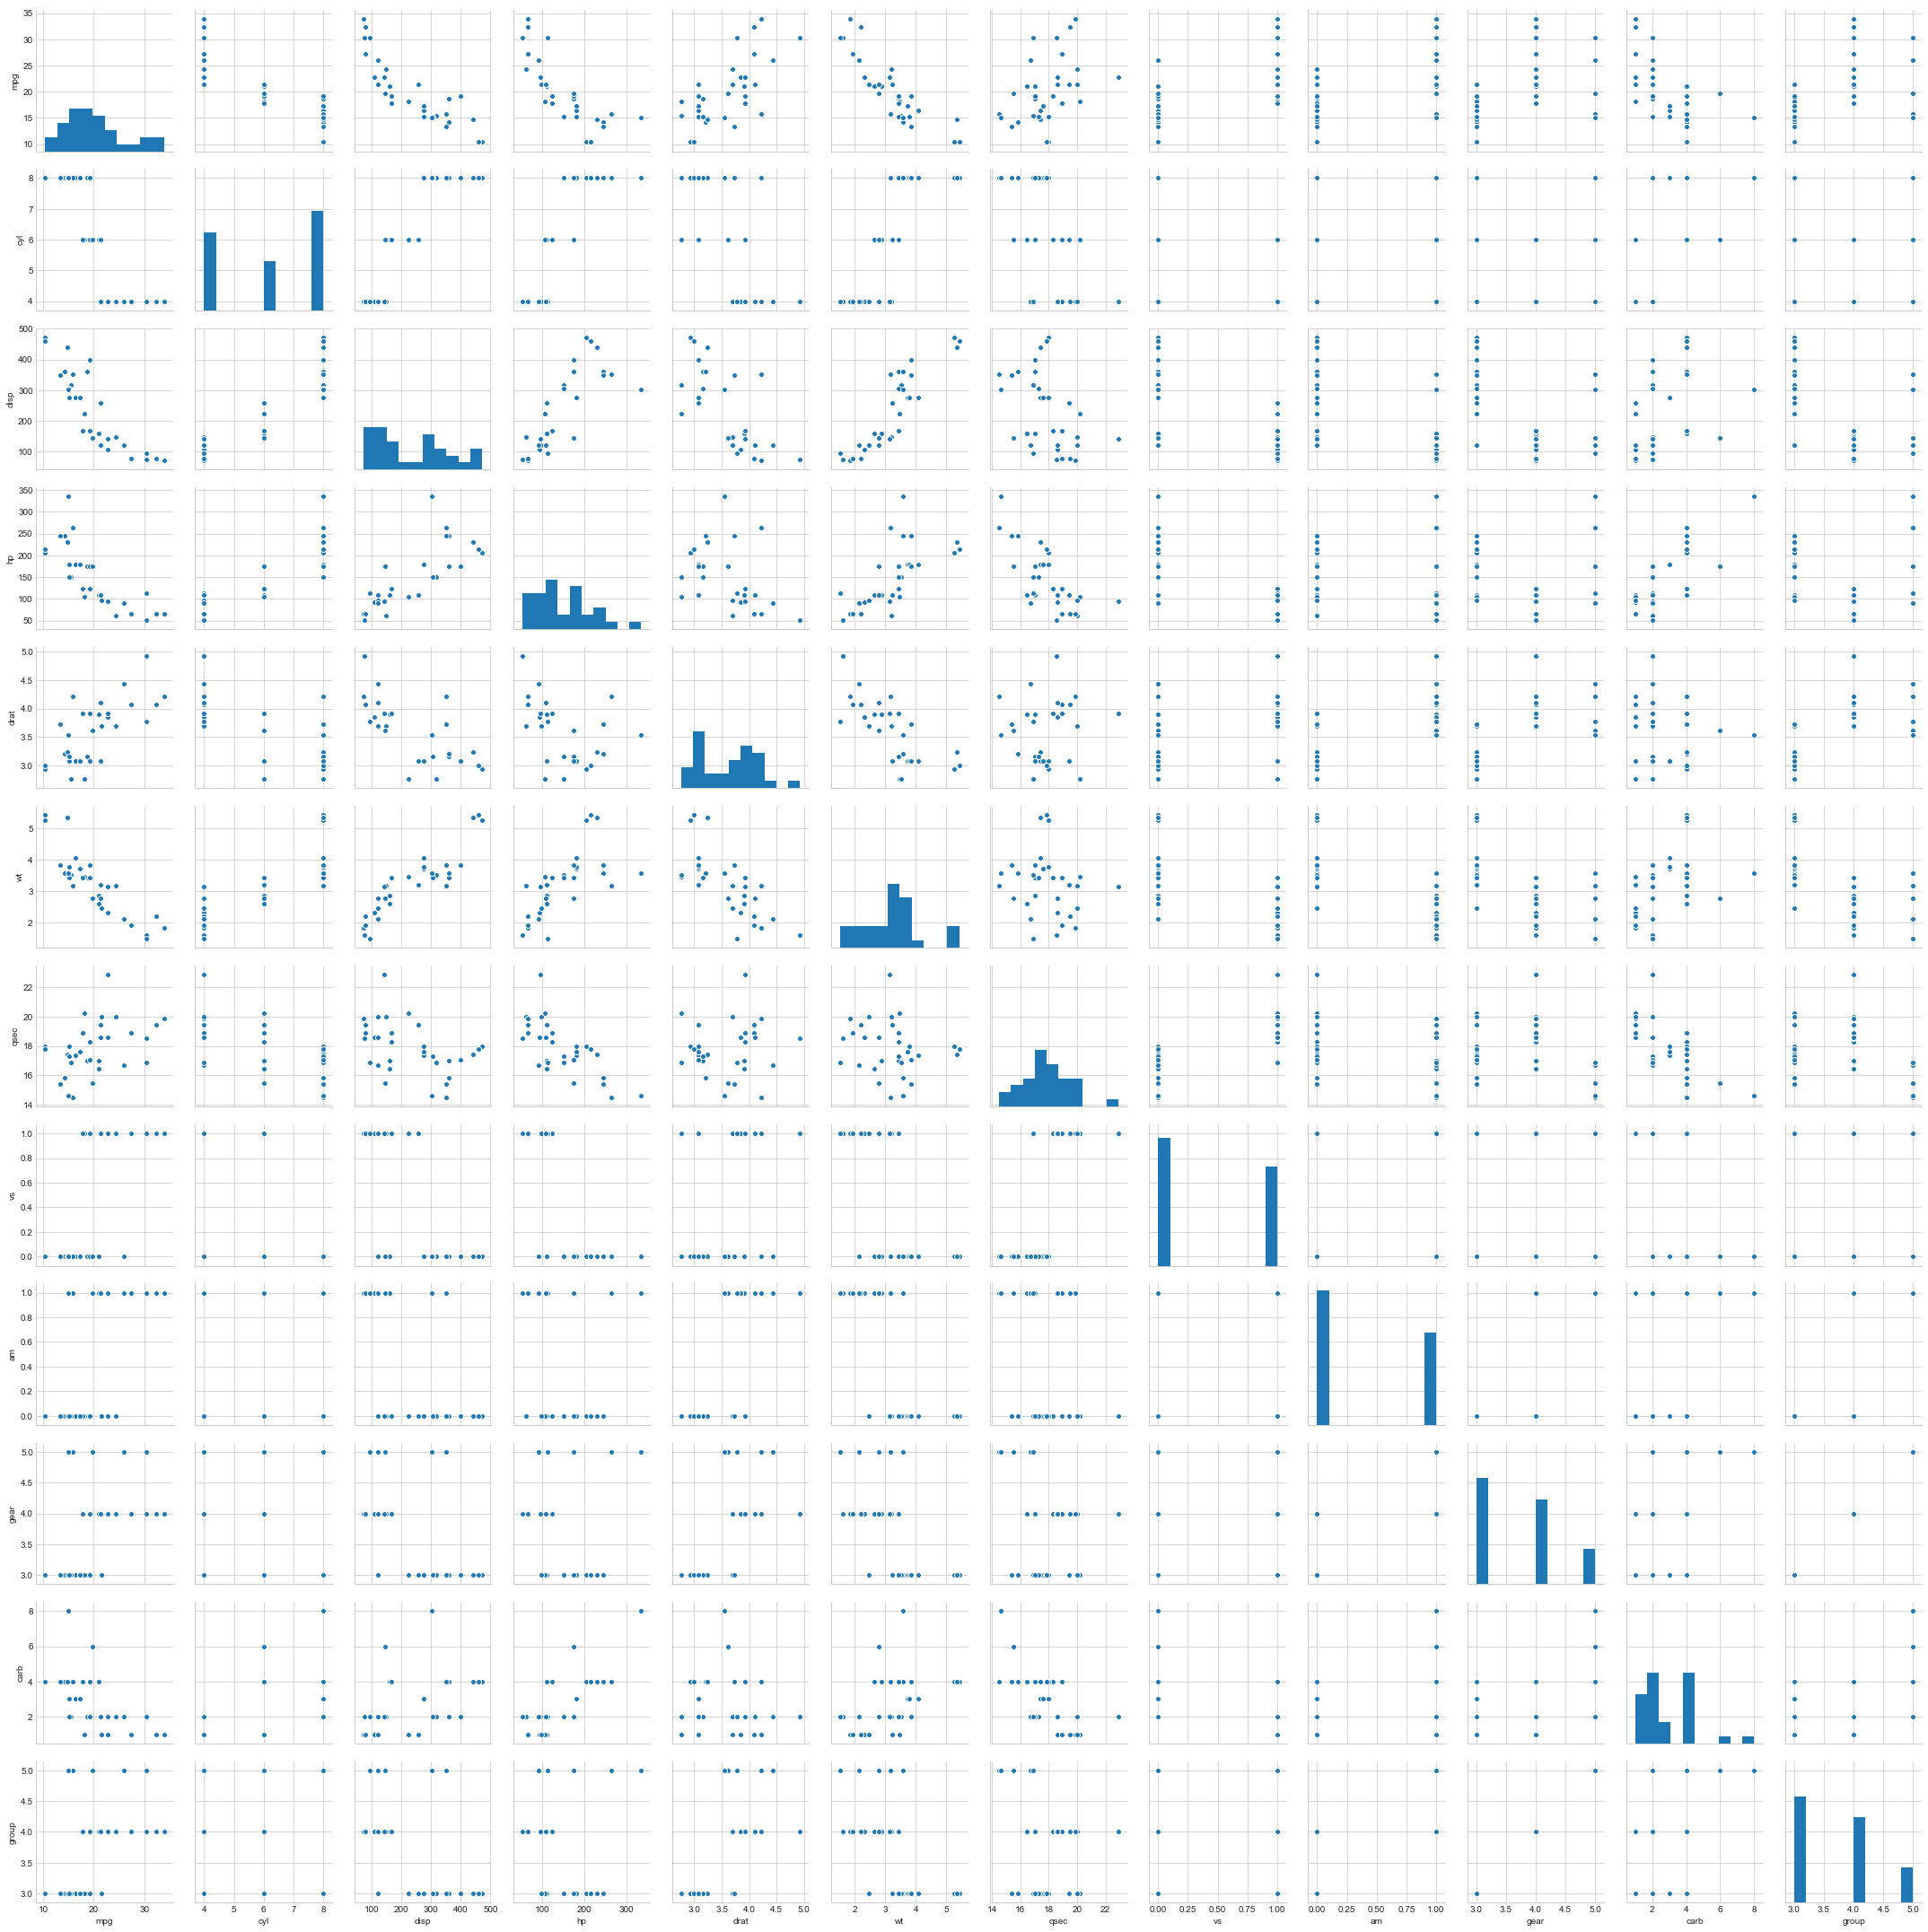

In [55]:
sns.pairplot(cars)

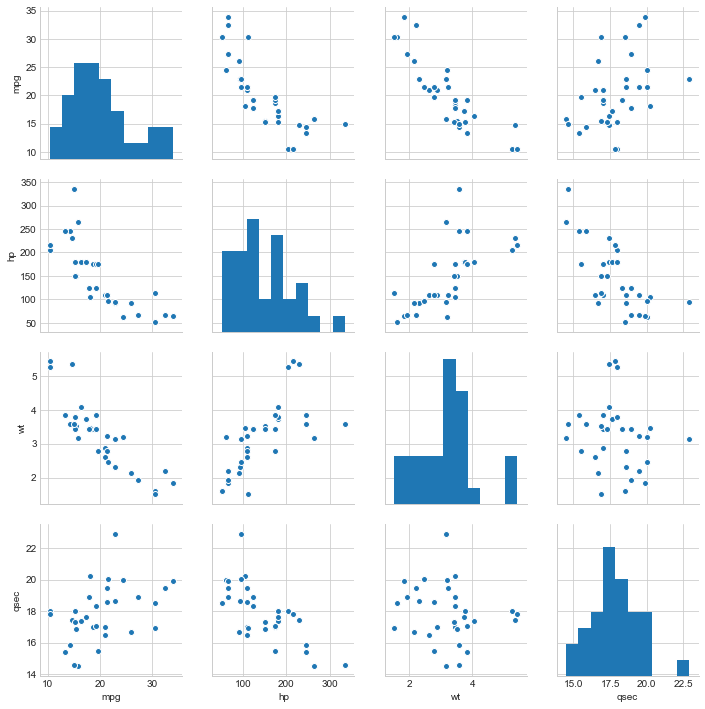

In [58]:
x= cars[['mpg','hp','wt','qsec']]
sns.pairplot(x)

### Using scipy to calculate pearson correlation

In [59]:

mpg=cars.mpg
hp=cars.hp
wt=cars.wt
qsec=cars.qsec

In [66]:
pearsonr_coefficient, p_value= pearsonr(mpg,hp)
print ( 'PearsonR Correlation Coefficient %0.3f'  % pearsonr_coefficient)

PearsonR Correlation Coefficient -0.776


In [67]:
pearsonr_coefficient, p_value= pearsonr(mpg,qsec)
print ( 'PearsonR Correlation Coefficient %0.3f'  % pearsonr_coefficient)

PearsonR Correlation Coefficient 0.419


In [68]:
pearsonr_coefficient, p_value= pearsonr(mpg,wt)
print ( 'PearsonR Correlation Coefficient %0.3f'  % pearsonr_coefficient)

PearsonR Correlation Coefficient -0.868


### Using pandas to calculate correlation

In [69]:
corr=x.corr() #corr is the correlation function
corr

,mpg,hp,wt,qsec
mpg,1.000000,-0.776168,-0.867659,0.418684
hp,-0.776168,1.000000,0.658748,-0.708223
wt,-0.867659,0.658748,1.000000,-0.174716
qsec,0.418684,-0.708223,-0.174716,1.000000


### Using Seaborn to visualize correlations

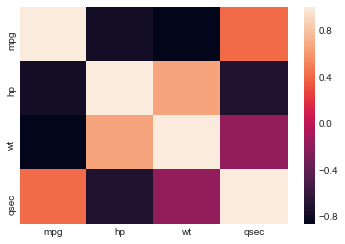

In [71]:
sns.heatmap(corr,xticklabels=corr.columns.values,yticklabels=corr.columns.values)

### Spearman rank correlation

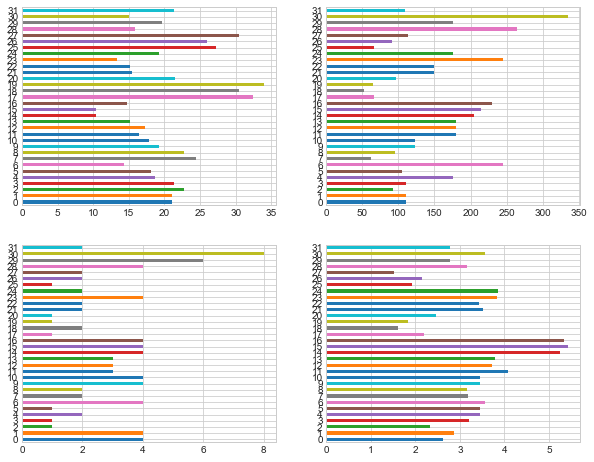

In [78]:
#Just plotting to keep up skills
f, ax = plt.subplots( 2,2, figsize=(10,8))

cars.mpg.plot(kind='barh',ax=ax[0, 0])

cars.hp.plot(kind='barh',ax=ax[0,1])

cars.carb.plot(kind='barh',ax=ax[1,0])

cars.wt.plot(kind='barh',ax=ax[1,1])

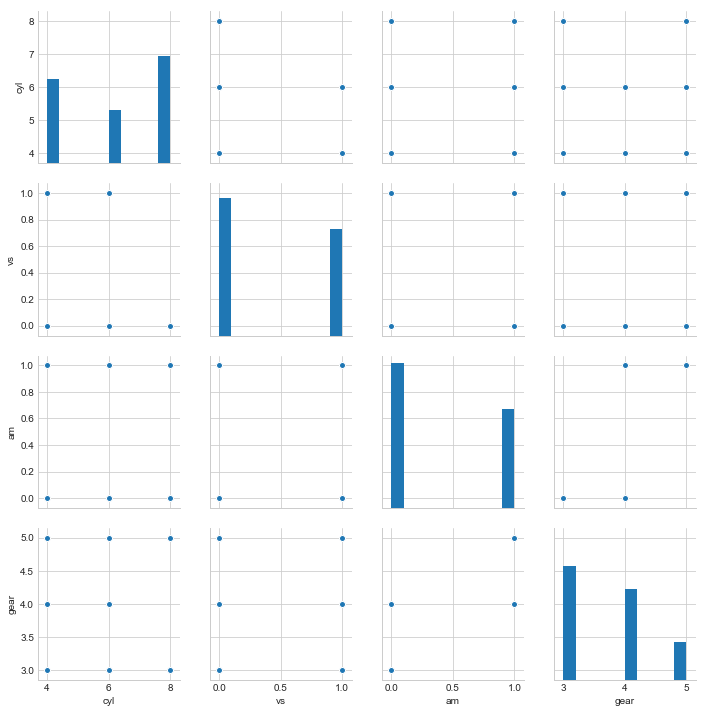

In [79]:
y= cars[['cyl','vs','am','gear']]

sns.pairplot(y)

In [82]:

cyl=cars.cyl
vs=cars.vs
am=cars.am
gear=cars.gear

In [85]:
spearmanr_coefficient, p_value= spearmanr(cyl,vs)
print ( 'SpearmanR Correlation Coefficient %0.3f'  % spearmanr_coefficient)

SpearmanR Correlation Coefficient -0.814


In [86]:
spearmanr_coefficient, p_value= spearmanr(cyl,am)
print ( 'SpearmanR Correlation Coefficient %0.3f'  % spearmanr_coefficient)

SpearmanR Correlation Coefficient -0.522


In [87]:
spearmanr_coefficient, p_value= spearmanr(cyl,gear)
print ( 'SpearmanR Correlation Coefficient %0.3f'  % spearmanr_coefficient)

SpearmanR Correlation Coefficient -0.564


### Chi squared test for independence

In [93]:
# to use chi squared test the data needs to be in a cross tab
table = pd.crosstab(cyl,am)

chi2,p,dof,expected= chi2_contingency(table.values)
print ('Chi Squared Statistic %0.3f p_value %0.3f'  % (chi2,p))

Chi Squared Statistic 8.741 p_value 0.013


In [96]:
table2 = pd.crosstab(cyl,vs)

chi2,p,dof,expected= chi2_contingency(table2.values)
print ('Chi Squared Statistic %0.3f p_value %0.3f'  % (chi2,p))

Chi Squared Statistic 21.340 p_value 0.000


In [98]:
table3 = pd.crosstab(cyl,gear)

chi2,p,dof,expected= chi2_contingency(table3.values)
print ('Chi Squared Statistic %0.3f p_value %0.3f'  % (chi2,p))

Chi Squared Statistic 18.036 p_value 0.001


In [ ]:
# since non of the p values are greater than 0.05 we must 
#reject the null hypothesis and conclude that the variables are correlated

# with the Chi squared test we need a p value greater than 0.05
#to reject the null hypothesis that the variables are independent of each other